In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sys.path.insert(0, "../scripts/")
from spliting import SplitData


In [2]:
df =pd.read_csv('../data/cleaned_data.csv')
df.sample(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,user_response
1199,f1b2ff1e-f781-446e-a8c4-c53daea7e9fb,exposed,2020-07-06,5,VTR-L09,6,Facebook,0
1223,f9c4603c-5ccf-4470-8e63-d1edc6fe87b2,control,2020-07-07,1,Generic Smartphone,6,Chrome Mobile,0
147,4f071ba2-33aa-4fa2-b539-97d9bacc322c,control,2020-07-08,21,Samsung SM-A405FN,6,Facebook,1
614,1134407e-af87-434f-ac7c-299dff13dae2,control,2020-07-04,21,Samsung SM-A705FN,6,Facebook,0
1048,b501c220-43b8-42a5-a507-9db9bd659e96,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
634,19548e79-bf25-4570-b8ca-54e8e28590f0,exposed,2020-07-03,1,Generic Smartphone,6,Chrome Mobile,0
297,9298f36a-b3b7-472e-923a-1cc1dbb919e7,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
1076,bfaa07e5-99ed-4975-b941-057d91629a61,exposed,2020-07-08,16,Samsung SM-A202F,6,Chrome Mobile WebView,0
1096,c8debff5-48be-4a6e-9a6b-eab3d676bdb8,control,2020-07-05,10,Samsung SM-G960F,6,Chrome Mobile WebView,0
497,e282a098-3437-4bf3-9819-f547f9ad9731,control,2020-07-08,21,Generic Smartphone,6,Chrome Mobile,1


In [10]:
browser_df=df.drop(['platform_os'],axis=1)
browser_df.head(10)


,auction_id,experiment,date,hour,device_make,browser,user_response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,Chrome Mobile,1
1,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,Facebook,1
2,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,Chrome Mobile,1
3,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,Facebook,1
4,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,Chrome Mobile,1
5,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,Chrome Mobile,1
6,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,Facebook,1
7,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,Chrome Mobile WebView,1
8,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,Chrome Mobile WebView,1
9,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,Chrome Mobile,1


In [11]:
browser_df.to_csv('../data/browser_clean_data.csv')

In [12]:
platform_df=df.drop(['browser'],axis=1)
platform_df.sample(10)

,auction_id,experiment,date,hour,device_make,platform_os,user_response
23,0aaf0e53-0aef-48e1-86b8-77a751b6ad2b,control,2020-07-08,14,Generic Smartphone,6,1
979,9b7a2497-f2f3-4cfd-bf1b-bf533fa39f4f,exposed,2020-07-10,2,Generic Smartphone,6,0
416,c03a506f-92e4-41e1-8859-841d21f18349,exposed,2020-07-04,6,Samsung SM-G965F,6,1
789,577d8982-42dc-401d-8fc3-56e394a96782,exposed,2020-07-09,16,Generic Smartphone,6,0
889,7d6e7872-c491-4fa5-9436-87e13c3e32dc,exposed,2020-07-08,21,Samsung SM-G950F,6,0
754,4e013f88-ee69-49b8-955d-c661d491a450,exposed,2020-07-07,17,Samsung SM-G980F,6,0
369,ad5c63c0-72b0-404b-8a50-501f8246be93,exposed,2020-07-09,11,Generic Smartphone,6,1
987,9ea96c35-6b58-477a-bcca-392be377e13b,control,2020-07-10,3,VFD 820,6,0
350,a6d7e9ac-1bf2-4ae3-b7c5-92b26ab22c27,exposed,2020-07-04,13,F3311,6,1
494,e21bd15a-bd75-44d7-accc-20b3580f6055,control,2020-07-04,16,Generic Smartphone,6,1


In [13]:
platform_df.to_csv('../data/platform_clean_data.csv')

# Accessing DVC version

In [3]:
import dvc.api

<h3>Accessing Browser Data</h3>

In [4]:
with dvc.api.open(
    'data/browser_clean_data.csv',
    repo="https://github.com/abu-bakarr/10_Academy_Week2_Group",
    
) as f:
    browser_df = pd.read_csv(f)
    
browser_df.drop(['auction_id','Unnamed: 0'],axis=1,inplace=True)


In [5]:
with dvc.api.open(
    "data/platform_clean_data.csv",
    repo="https://github.com/abu-bakarr/10_Academy_Week2_Group",
) as fd:
    platform_df = pd.read_csv(fd)
    
platform_df.drop(["auction_id", "Unnamed: 0"], axis=1, inplace=True)


In [18]:
browser_df.sample(3)

,experiment,date,hour,device_make,browser,user_response
460,exposed,2020-07-09,18,Generic Smartphone,Chrome Mobile,1
648,exposed,2020-07-08,5,ELE-L29,Facebook,0
84,exposed,2020-07-09,22,Generic Smartphone,Chrome Mobile,1


In [6]:
def encode_labels(df):
    df['experiment'].replace(['control'],0,inplace=True)
    df["experiment"].replace(["exposed"], 1, inplace=True)
    df["date"]=preprocessing.LabelEncoder().fit_transform(df["date"])
    df["experiment"]=preprocessing.LabelEncoder().fit_transform(df["experiment"])
    df["hour"]=preprocessing.LabelEncoder().fit_transform(df["hour"])
    df["device_make"]=preprocessing.LabelEncoder().fit_transform(df["device_make"])
    
    return df

def encode_browser_labels(df):
    b_df=encode_labels(df)
    b_df["browser"]=preprocessing.LabelEncoder().fit_transform(df["browser"])
    return b_df
    
def encode_platform_labels(df):
    p_df=encode_labels(df)
    p_df["platform_os"]=preprocessing.LabelEncoder().fit_transform(df["platform_os"])
    return p_df
    


In [7]:
encoded_browser_df=encode_browser_labels(browser_df)
encoded_browser_df.sample(3)

,experiment,date,hour,device_make,browser,user_response
574,0,0,15,13,1,0
342,0,3,7,27,2,1
570,1,2,21,13,1,1


In [12]:
platform_df.sample(3)

,experiment,date,hour,device_make,platform_os,user_response
420,exposed,2020-07-09,20,Generic Smartphone,6,1
653,exposed,2020-07-05,8,Generic Smartphone,6,0
1215,exposed,2020-07-10,5,Samsung SM-G960F,6,0


In [8]:
encoded_platform_df = encode_platform_labels(platform_df)
encoded_platform_df.sample(3)


,experiment,date,hour,device_make,platform_os,user_response
898,0,1,9,13,1,0
1166,0,0,15,13,1,0
847,0,0,15,13,1,0


<h5>Setting up training,validation and testing data</h5>

In [9]:
split_browser_data=SplitData(encoded_browser_df)
split_browser_data

In [10]:
split_platform_data=SplitData(encoded_platform_df)

In [11]:
Xb_train, Xb_test, yb_train, yb_test=split_browser_data.test_validate_train(0.7,'user_response')

In [15]:
Xb_train


,experiment,date,hour,device_make,browser
1131,0,0,15,13,1
363,1,5,16,13,1
947,0,0,15,13,1
932,1,2,7,13,1
858,1,2,11,13,1
...,...,...,...,...,...
1044,0,0,15,13,1
1095,0,6,8,13,1
1130,0,0,15,91,2
860,0,1,6,13,1


In [44]:
Xp_train, Xp_test, yp_train, yp_test = split_platform_data.test_validate_train(0.7, "user_response")


<h2>Training with each dataset</h2>

<h2>Logistic Regression</h2>

<h4>Browser Data</h4>

In [22]:
logreg=LogisticRegression(random_state=None)
logreg.fit(Xb_train,yb_train) 
scores=cross_val_score(estimator=logreg,X=Xb_train,y=yb_train,cv=5,scoring='accuracy')
print(scores)
print('Mean LogisticRegression score :',scores.mean())

[0.54017857 0.52678571 0.57589286 0.53363229 0.52914798]
Mean LogisticRegression score : 0.5411274823830878


In [27]:
feat_imp_log = pd.DataFrame({"Feature Importance": logreg.coef_[0]})
feat_imp_log["Feature"] = ['experiment'	,'date'	,'hour','device_make',	'browser']
feat_imp_log = feat_imp_log.set_index("Feature")
feat_imp_log = feat_imp_log.sort_values(by=["Feature Importance"], ascending=False)
feat_imp_log

,Feature Importance
Feature,
experiment,0.108938
hour,0.023656
device_make,0.003224
date,0.001580
browser,-0.040317


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Feature'>

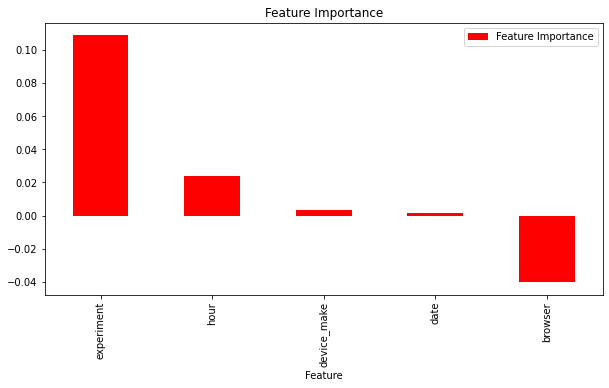

In [46]:
feat_imp_log.plot.bar(figsize=(10,5), title = "Feature Importance", fontsize=10, rot=90, color='r')

<h4>Platform Data</h4>

In [49]:
logregp=LogisticRegression(random_state=None)
logregp.fit(Xp_train,yp_train) 
scores=cross_val_score(estimator=logreg,X=Xp_train,y=yp_train,cv=5,scoring='accuracy')
print(scores)
print('Mean LogisticRegression score :',scores.mean())

[0.54464286 0.54017857 0.57142857 0.52017937 0.53363229]
Mean LogisticRegression score : 0.542012331838565


In [52]:
feat_imp_log = pd.DataFrame({"Feature Importance": logregp.coef_[0]})
feat_imp_log["Feature"] = ["experiment", "date", "hour", "device_make", "platform_os"]
feat_imp_log = feat_imp_log.set_index("Feature")
feat_imp_log = feat_imp_log.sort_values(by=["Feature Importance"], ascending=False)
feat_imp_log


,Feature Importance
Feature,
platform_os,0.561954
experiment,0.119903
hour,0.022742
device_make,0.002181
date,0.001086


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Feature'>

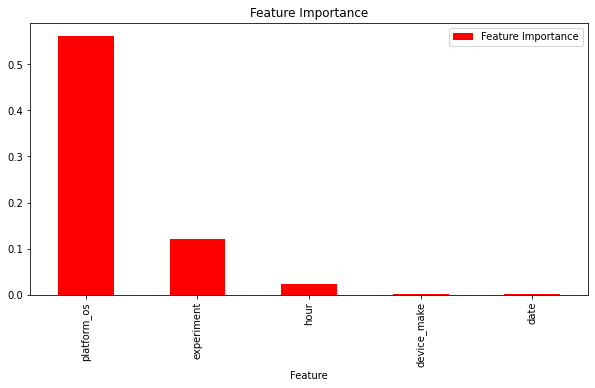

In [53]:
feat_imp_log.plot.bar(
    figsize=(10, 5), title="Feature Importance", fontsize=10, rot=90, color="r"
)


<h2>Decision Tree</h2>

<h4>Browser Data</h4>

In [23]:
dec = DecisionTreeClassifier()
dec.fit(Xb_train, yb_train)
dec_scores = cross_val_score(
    estimator=dec, X=Xb_train, y=yb_train, cv=5, scoring="accuracy"
)
print(dec_scores)
print("Mean clf score :", dec_scores.mean())


[0.55803571 0.51339286 0.48660714 0.56053812 0.49775785]
Mean clf score : 0.5232663356822549


In [31]:
feat_imp_dec = pd.DataFrame({"Feature Importance": dec.feature_importances_})
feat_imp_dec["Feature"] = ["experiment", "date", "hour", "device_make", "browser"]
feat_imp_dec = feat_imp_dec.set_index("Feature")
feat_imp_dec = feat_imp_dec.sort_values(by=["Feature Importance"], ascending=False)
feat_imp_dec


,Feature Importance
Feature,
hour,0.323808
device_make,0.263280
date,0.243020
browser,0.093310
experiment,0.076583


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Feature'>

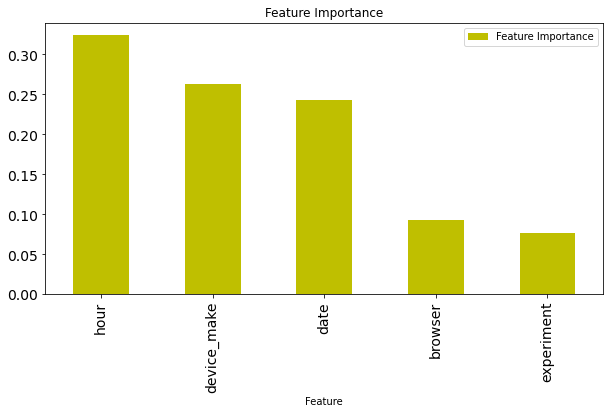

In [54]:
feat_imp_dec.plot.bar(
    figsize=(10, 5), title="Feature Importance", fontsize=14, rot=90, color="y"
)


<h4>Platform Data</h5>

In [55]:
dec = DecisionTreeClassifier()
dec.fit(Xp_train, yp_train)
dec_scores = cross_val_score(
    estimator=dec, X=Xp_train, y=yp_train, cv=5, scoring="accuracy"
)
print(dec_scores)
print("Mean clf score :", dec_scores.mean())

[0.54464286 0.52232143 0.51339286 0.58295964 0.51121076]
Mean clf score : 0.5349055092889173


In [56]:
feat_imp_dec = pd.DataFrame({"Feature Importance": dec.feature_importances_})
feat_imp_dec["Feature"] = ["experiment", "date", "hour", "device_make", "platform_os"]
feat_imp_dec = feat_imp_dec.set_index("Feature")
feat_imp_dec = feat_imp_dec.sort_values(by=["Feature Importance"], ascending=False)
feat_imp_dec

,Feature Importance
Feature,
hour,0.330408
device_make,0.305530
date,0.275178
experiment,0.088885
platform_os,0.000000


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Feature'>

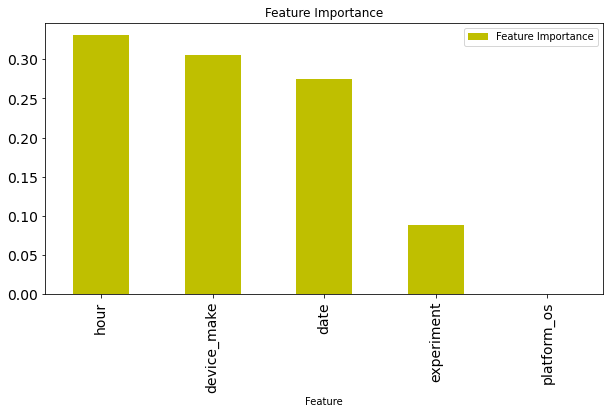

In [57]:
feat_imp_dec.plot.bar(
    figsize=(10, 5), title="Feature Importance", fontsize=14, rot=90, color="y"
)


<h2>XGBoost</h2>

<h4>Browser Data</h4>

In [33]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    Xb_train,
    yb_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(Xb_test, yb_test)],
    verbose=False,
)
# Then predict results from X_test data
pred_xgb = xgb.predict(Xb_test)


c:\Users\hp\anaconda3\envs\week1\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

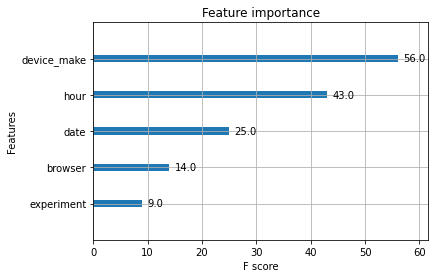

In [34]:
from xgboost import plot_importance
plot_importance(xgb)


<h4>Platform Data</h4>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

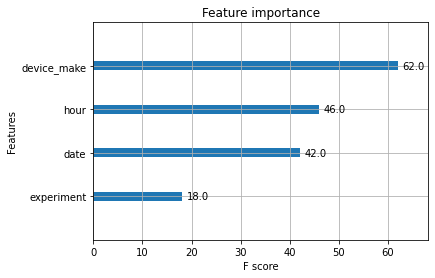

In [59]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    Xp_train,
    yp_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(Xp_test, yp_test)],
    verbose=False,
)
# Then predict results from X_test data
pred_xgb = xgb.predict(Xp_test)
plot_importance(xgb)


<h2>Random Forest</h2>

<h4>Browser Data</h4>

In [39]:
rfc = RandomForestClassifier(n_estimators=100)

# We fit our model with our train data
rfc.fit(Xb_train, yb_train)

pred_rfc = rfc.predict(Xb_test)



In [40]:
feat_imp_rfc = pd.DataFrame({"Feature Importance": rfc.feature_importances_})
feat_imp_rfc["Feature"] = ["experiment", "date", "hour", "device_make", "browser"]
feat_imp_rfc = feat_imp_rfc.set_index("Feature")
feat_imp_rfc = feat_imp_rfc.sort_values(by=["Feature Importance"], ascending=False)
feat_imp_rfc


,Feature Importance
Feature,
hour,0.410414
device_make,0.274852
date,0.184800
browser,0.080541
experiment,0.049392


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Feature'>

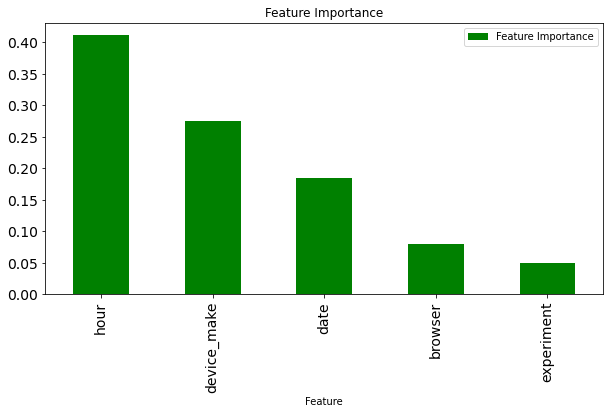

In [60]:
feat_imp_rfc.plot.bar(
    figsize=(10, 5), title="Feature Importance", fontsize=14, rot=90, color="g"
)


<h4>Platform Data</h4>

In [61]:
rfc = RandomForestClassifier(n_estimators=100)

# We fit our model with our train data
rfc.fit(Xp_train, yp_train)

pred_rfc = rfc.predict(Xp_test)


In [64]:
feat_imp_rfc = pd.DataFrame({"Feature Importance": rfc.feature_importances_})
feat_imp_rfc["Feature"] = ["experiment", "date", "hour", "device_make", "platform_os"]
feat_imp_rfc = feat_imp_rfc.set_index("Feature")
feat_imp_rfc = feat_imp_rfc.sort_values(by=["Feature Importance"], ascending=False)
feat_imp_rfc


,Feature Importance
Feature,
hour,0.408855
device_make,0.359994
date,0.187158
experiment,0.039563
platform_os,0.004430


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Feature'>

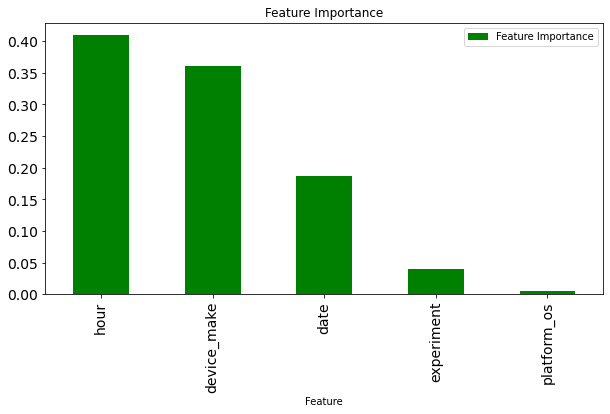

In [65]:
feat_imp_rfc.plot.bar(
    figsize=(10, 5), title="Feature Importance", fontsize=14, rot=90, color="g"
)